<a href="https://colab.research.google.com/github/gnc506/Skills_Assessment/blob/main/Skill_Assessment_2_Tabassum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#load datasets
articles_data = pd.read_csv('/content/drive/MyDrive/articles.Dengue.csv')
authors_data = pd.read_csv('/content/drive/MyDrive/authors.Dengue.csv')
paper_count_data = pd.read_csv('/content/drive/MyDrive/paper_counts.csv')

#Who is working with whom Collaboration.


In [53]:
from itertools import combinations
from collections import defaultdict

In [54]:
# Creating a dictionary to count collaborations between each pair of authors
collaboration_counter = defaultdict(int)

for _, paper in authors_data.groupby('PMID'):
    authors = paper['AuthorLastname'].tolist()
    for author1, author2 in combinations(authors, 2):
        # Sort the pair to avoid duplicate entries (e.g., (A, B) is the same as (B, A))
        author_pair = tuple(sorted([author1, author2]))
        collaboration_counter[author_pair] += 1


In [55]:
# Sorting the collaborations by their counts
sorted_collaborations = sorted(collaboration_counter.items(), key=lambda x: x[1], reverse=True)


In [56]:
# Selecting the top 20 collaborations
top_collaborations = sorted_collaborations[:20]

In [57]:

# Creating a DataFrame for the top collaborations
top_collaborations_df = pd.DataFrame(top_collaborations, columns=['Author Pair', 'Number of Collaborations'])
top_df = top_collaborations_df.head(20)  # Display the top 20 collaborations
top_df

,Author Pair,Number of Collaborations
0,"(Chen, Lin)",232
1,"(Li, Zhang)",204
2,"(Chen, Liu)",198
3,"(Chen, Wang)",186
4,"(Wang, Zhang)",186
5,"(Li, Wang)",182
6,"(Li, Liu)",181
7,"(Nguyen, Nguyen)",158
8,"(Chen, Li)",153
9,"(Chen, Wu)",153


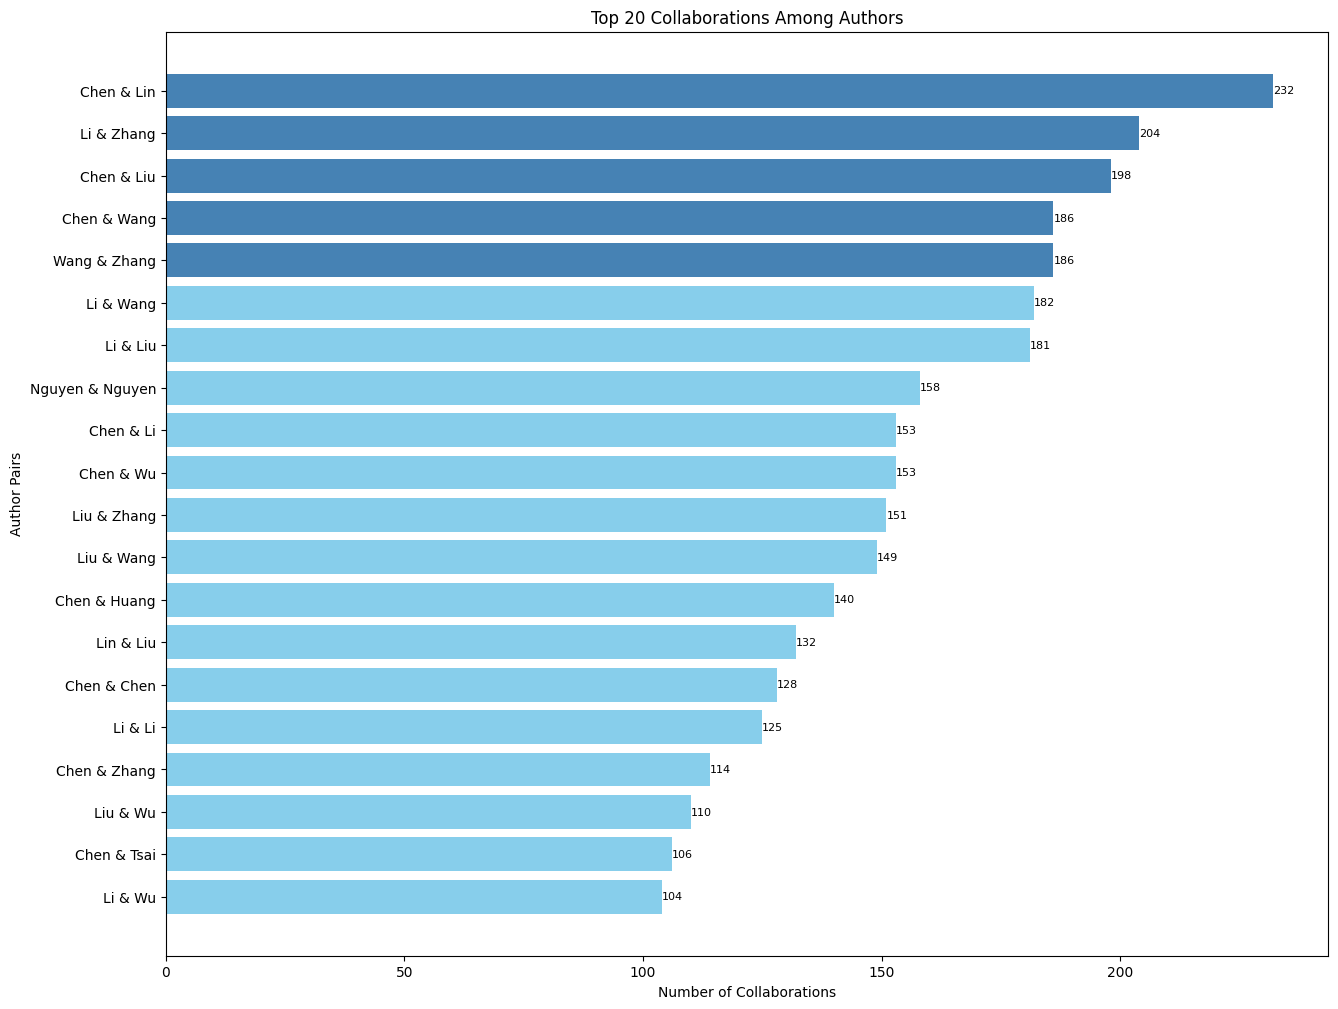

In [69]:
import matplotlib.pyplot as plt

# Preparing data for plotting
author_pairs = [" & ".join(pair) for pair, _ in top_collaborations]
collaboration_counts = [count for _, count in top_collaborations]

# Improved visualization with enhanced readability and distinct coloring for top collaborations

# Selecting a color scheme
colors = ['steelblue' if i < 5 else 'skyblue' for i in range(len(collaboration_counts))]

# Plotting
plt.figure(figsize=(15, 12))
bars = plt.barh(author_pairs, collaboration_counts, color=colors)
plt.xlabel('Number of Collaborations')
plt.ylabel('Author Pairs')
plt.title('Top 20 Collaborations Among Authors')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value on top

# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=8)
    plt.savefig('collaboration.png')
plt.show()

#Performing the visualization

In [70]:
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [72]:
# Finding the top 5 authors based on the number of collaborations
author_collaboration_counts = defaultdict(int)

In [73]:
for _, paper in authors_data.groupby('PMID'):
    authors = paper['AuthorLastname'].tolist()
    for author in authors:
        author_collaboration_counts[author] += len(authors) - 1  # Counting collaborations for each author


In [74]:

# Sorting authors by their number of collaborations
sorted_authors = sorted(author_collaboration_counts.items(), key=lambda x: x[1], reverse=True)


In [75]:
# Selecting the top 10 authors
top_5_authors = sorted_authors[:5]
top_5_authors_names = [author[0] for author in top_5_authors]


In [77]:
# Creating a network graph for the top 10 authors
G_top_5 = nx.Graph()

for _, paper in authors_data.groupby('PMID'):
    authors = [author for author in paper['AuthorLastname'].tolist() if author in top_5_authors_names]
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G_top_5.add_edge(authors[i], authors[j])


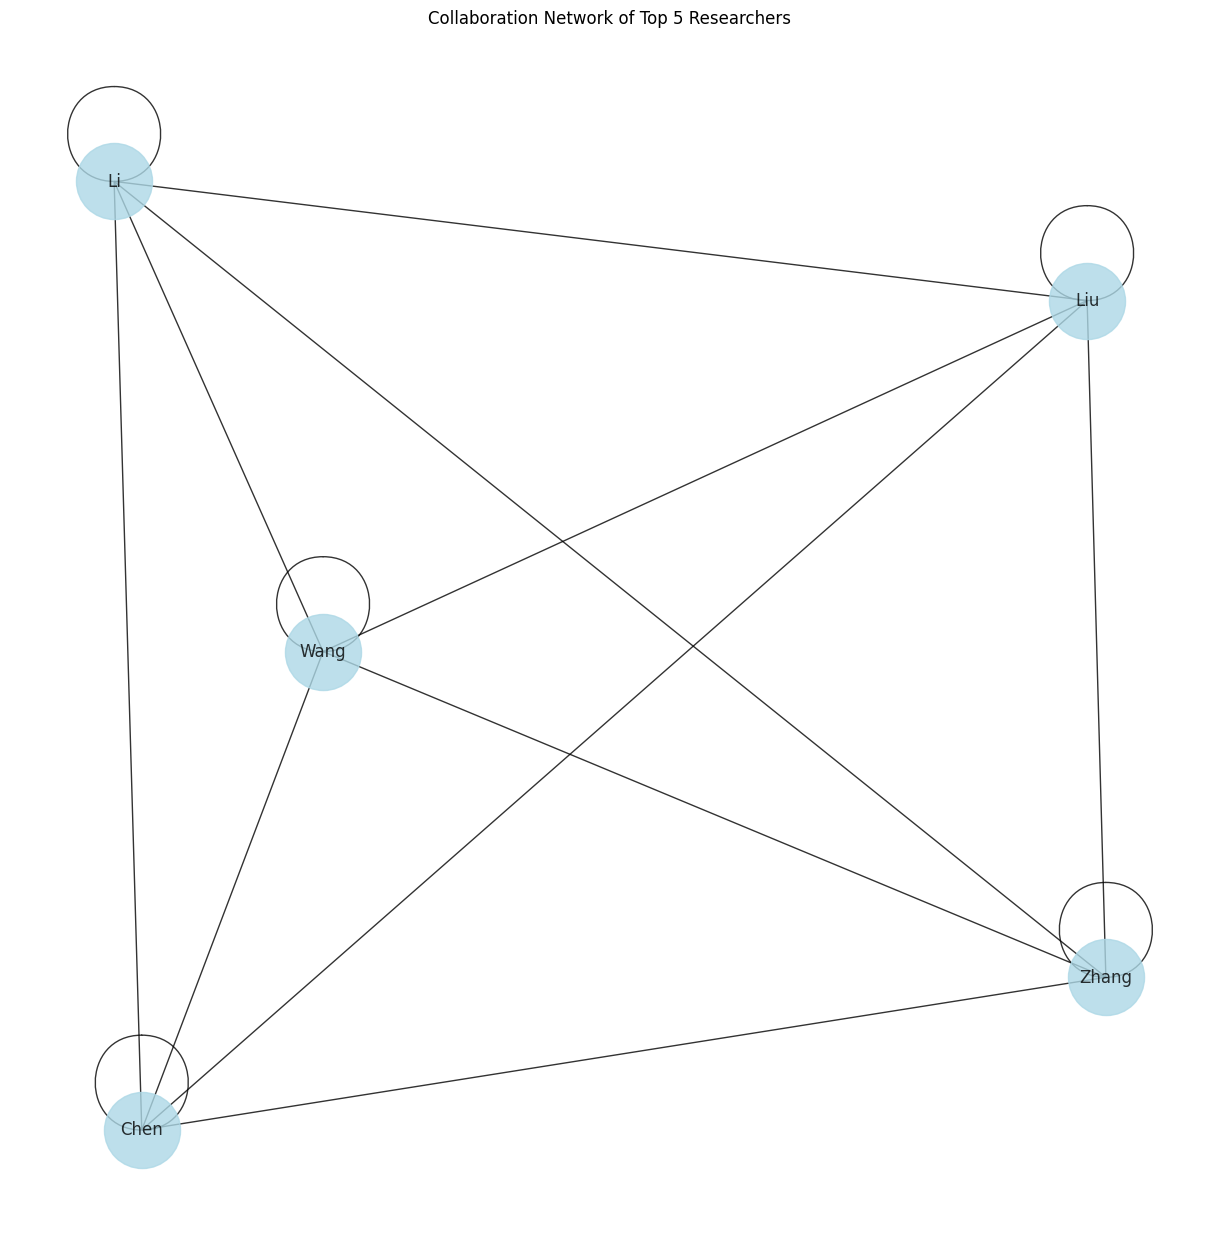

In [79]:
# Drawing the network graph
plt.figure(figsize=(12, 12))
nx.draw(G_top_5, with_labels=True, node_size=3000, node_color='lightblue', alpha=0.8, font_size=12)
plt.title("Collaboration Network of Top 5 Researchers")

plt.savefig('plot.png')
plt.show()

In [11]:
# Commenting the code as the network is too complex for now to understand
#import networkx as nx

In [12]:
# Creating a network graph for the top collaborations
#G = nx.Graph()

In [13]:
# Adding edges with weights (number of collaborations)
'''for (author1, author2), count in top_collaborations:
    G.add_edge(author1, author2, weight=count)'''

In [26]:
# Positioning the graph using spring layout for better visibility
#pos = nx.spring_layout(G, k=0.5, iterations=1)

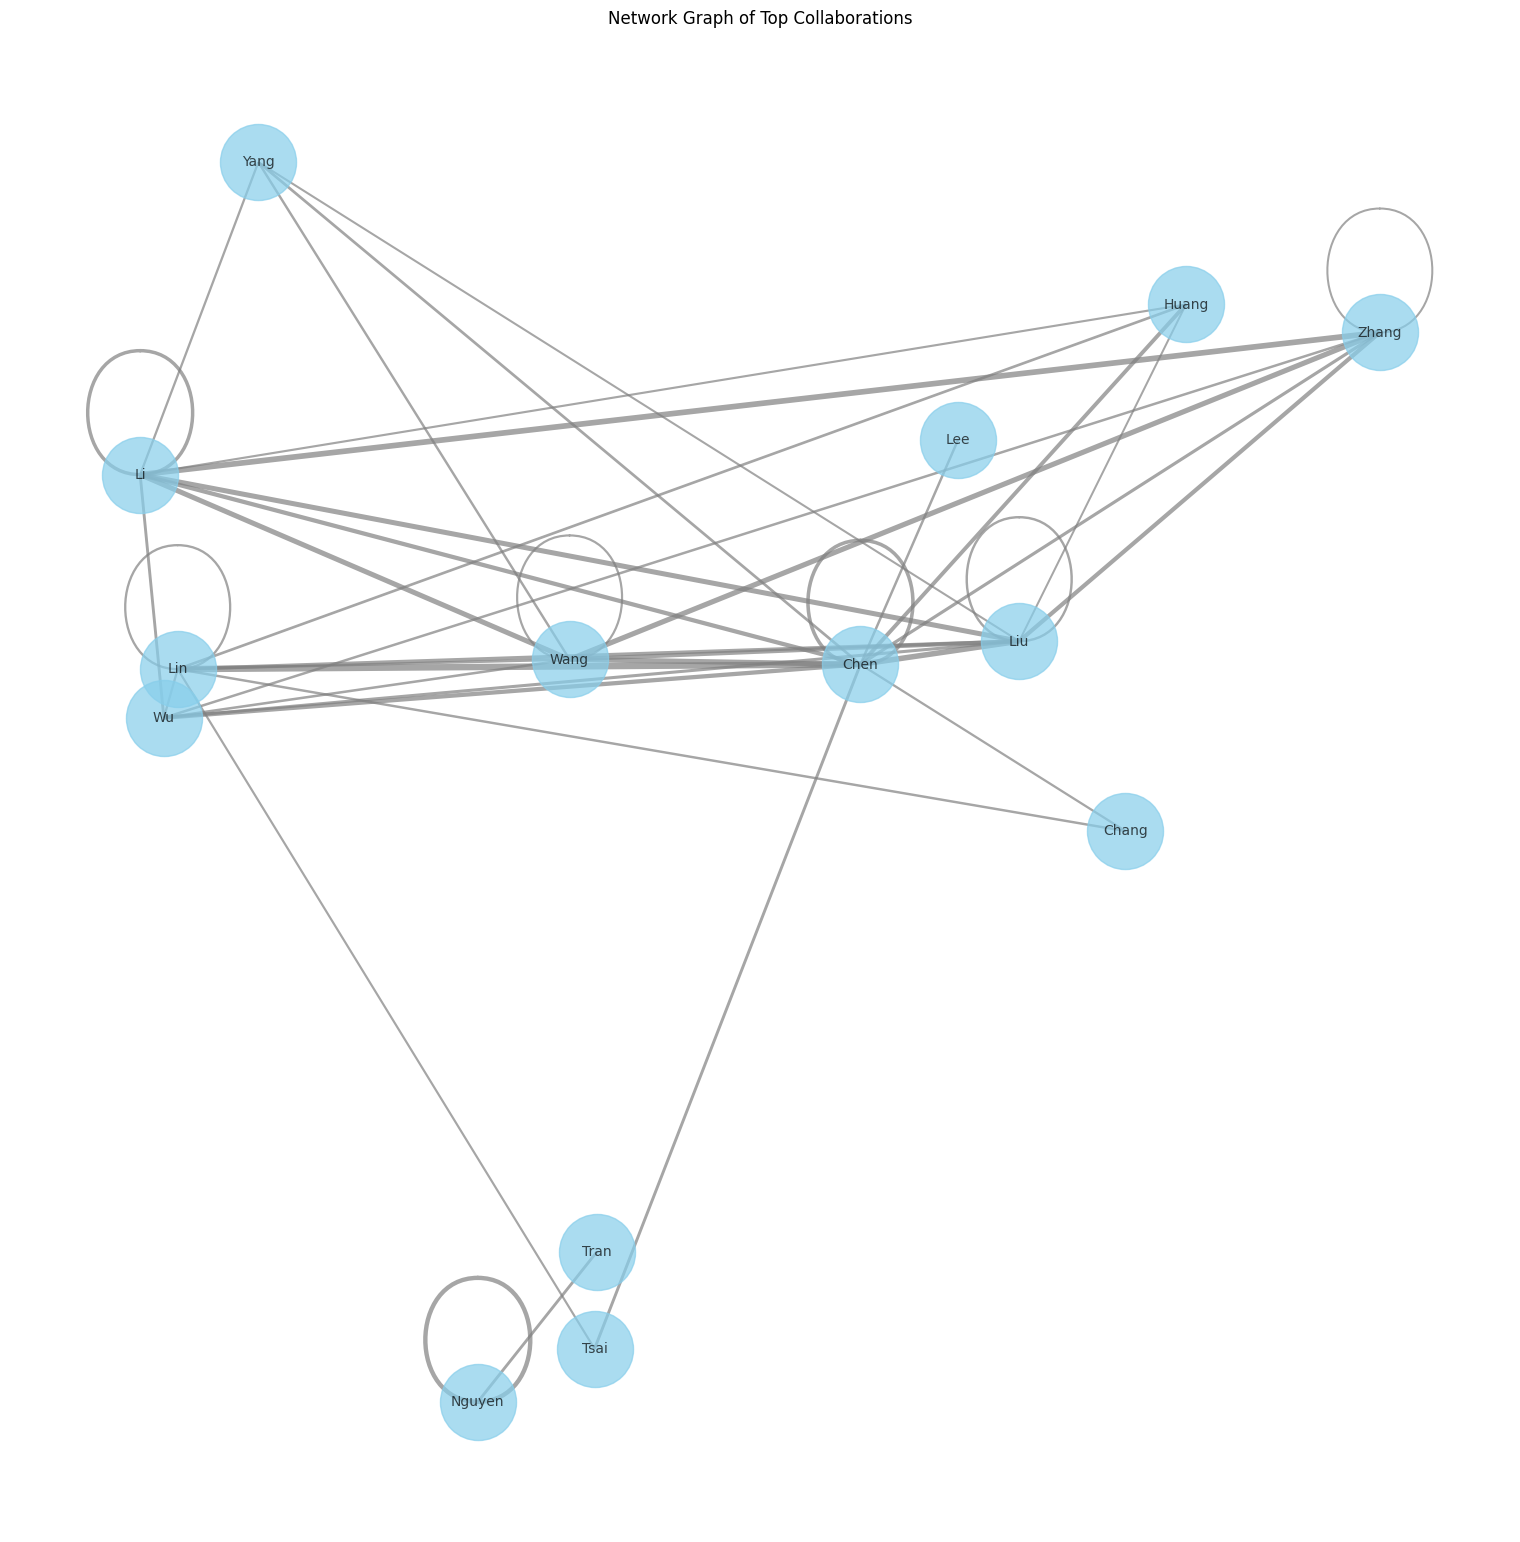

In [27]:
# Drawing the network graph
'''plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', alpha=0.7,
        width=[(G[u][v]['weight']/50) for u, v in G.edges()], edge_color='gray', font_size=10)
plt.title('Network Graph of Top Collaborations')
plt.show()'''